# Quick calculating tool for 1D lattice experiments

In [1]:
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import numpy as np
import matplotlib.colors as colors
from scipy.optimize import fsolve, curve_fit

hbar = 1.0545718*10**-34
c = 2.99792458*10**8
polarizability_0 = 1.64877727*10**(-41)
m = 163.929*1.66053906660*10**(-27)
epsilon_0 = 8.85418782*10**(-12)
k_B = 1.38064852*10**(-23)
a_0 = 5.29177210903*10**(-11)
mu_B = 9.274009994*10**(-24)

Gamma_741 = 2*np.pi*1.78*10**3   # in Hz
omega_741 = 2*np.pi*c/(741*10**(-9))
Gamma_421 = 2*np.pi*32.2*10**6
omega_421 = 2*np.pi*c/(421.172*10**(-9))
delta_421 = omega_421 - omega_741

E_recoil = hbar**2*(2*np.pi/(741*10**(-9)))**2/(2*m)

##### Clebsch Gordan Factor

omega_405 = 2*np.pi*c/(404.597*10**(-9))
omega_419 = 2*np.pi*c/(418.682*10**(-9))
Gamma_405 = 1.92*10**8
Gamma_419 = 1.26*10**8

(1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)

omega_419_bis = 2*np.pi*c/(419.484*10**(-9))
Gamma_419_bis = 8.8*10**7

kappa_blue = (1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(1/9)*(Gamma_419_bis/Gamma_421)**2*(omega_421/omega_419_bis)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)

omega_626 = 2*np.pi*c/(626*10**(-9))
Gamma_626 = 2*np.pi*135*10**3
(1/2)*((1/9)*(Gamma_626/Gamma_421)**2*(omega_421/omega_626)**6)

kappa_red = (1/2)*(1+1/153)

### Trap depth

The trap depth in single beam ODT is:
\begin{equation}
\label{eq:trap_depth}
U_{\text{ODT}} = \frac{1}{4}\text{Re}(\alpha)E^{2} = \frac{1}{2}\text{Re}(\alpha)\frac{I_{0}}{\epsilon_{0}c}
\end{equation}

For a Gaussian beam, noting $I_{0}$ the peak intensity, we have:
\begin{equation}
\label{gaussian_intensity}
I_{0} = \frac{2P}{\pi w_{0}^{2}}
\end{equation}

Where $w_{0}$ is the beam waist (radius). And in our case of a lattice, the trap depth comes from the 2 beams interfering, giving rise to a field amplitude of $2E$ at the antinodes, and thus 4 times the trapping depth compare to a regular ODT:
\begin{equation}
U = 2\text{Re}(\alpha)\frac{I_{0}}{\epsilon_{0}c} = 4\text{Re}(\alpha)\frac{P}{\pi w_{0}^{2}\epsilon_{0}c}
\end{equation}

### Trap frequency

The potential shape is $U\sin^{2}(kz)$, so near an antinode:
\begin{equation}
\label{trap_freq_depth}
Uk^{2}z^{2}=\frac12m\omega_{z}^{2}z^{2}
\end{equation}
which gives the trapping frequency in the lattice:
\begin{equation}
\label{trap_frequency}
\omega_{z}^{2} = 8\text{Re}(\alpha)\frac{Pk^{2}}{\pi w_{0}^{2}\epsilon_{0}cm}= \frac{32\pi\text{Re}(\alpha) P}{\lambda^{2} w_{0}^{2}\epsilon_{0}cm}
\end{equation}

It is useful to have the correspondance between trap frequency en lattice depth:
\begin{equation}
\frac{U}{E_{r}}=\frac{\frac{m\omega_{z}^{2}}{2k^{2}}}{\frac{\hbar^{2}k^{2}}{2m}} = \frac{m^{2}\omega_{z}^{2}}{\hbar^{2}k^{4}} = 0.05 (\omega_{z}(\text{kHz}))^{2}
\end{equation}

In [2]:
omega_z = 2*np.pi*100*10**3 # Hertz
U_in_recoil = m**2*(omega_z)**2/(hbar**2*(2*np.pi/(741*10**(-9)))**4)
print("A trap frequency of " + str(int(omega_z/(2*np.pi*10**3))) + 
      " kHz corresponds to " + str(int(U_in_recoil))+ " recoils")

A trap frequency of 100 kHz corresponds to 508 recoils


### Polarizability

To evaluate the trap frequency we need the polarizability:
\begin{equation}
\text{Re}\left(\alpha(\omega)\right) = \frac{2}{\hbar}\sum_{k} d_{k}^{2}\frac{\omega_{kg}}{\omega_{kg}^{2}-\omega^{2}} = 6\pi\epsilon_{0}c^{3}\sum_{k}\frac{\Gamma_{k}}{\omega_{kg}^{3}}\frac{\omega_{kg}}{\omega_{kg}^{2}-\omega^{2}}
\end{equation}

Ben Lev's paper (arXiv:1011.4738) gives the background polarizability of dysprosium around 741: $\alpha_{741} = 220 \text{ a.u.}$. We add the single 741 line on top of that, and since $\omega \simeq \omega_{741}$:
\begin{equation}
\begin{array}{llll}
\text{Re}(\alpha) &=& \alpha_{741} - 3\pi\kappa_{r}\epsilon_{0}c^{3}\frac{\Gamma_{741}}{\omega_{741}^{3}}\frac{1}{\Delta_{741}} \\[10pt]
	&=& 220 - \frac{7437}{\Delta\text{ (GHz)}}\text{ a.u.}
\end{array}
\end{equation}

I introduced here $\kappa_{r} = \frac{1}{2}1^{2}+\frac{1}{2}\frac{1}{153} \simeq \frac{1}{2}$ to take into account the anisotropy due to the different Clebsch-Gordan coefficient in a linearly polarized lattice, with the electric field being orthogonal to the quantization axis. It is not clear if it should be factored out in front of the background polarizability also.
With $\Delta_{741} = \omega - \omega_{741}$ being negative for red-detuned light.

Converted into trap frequency through \ref{trap_frequency} it gives for the background polarizability trap frequency:
\begin{equation}
\omega_{z} = 2\pi\cdot 4.8\text{ MHz}\left( \frac{\sqrt{P(\text{Watt})}}{w_{0}(\mu\text{m})}\right)
\end{equation}

A $P = 0.5\text{ W}$ and $w_{0} = 10\mu\text{m}$ beam, without even thinking of the 741 line coming into play gives a bare trap frequency of 340 kHz. Considering the transition with the red light -100 GHz of detuning brings us to 395 kHz. The whole curve is plotted in figure \ref{trap_frequency_image}.

In [3]:
P = 0.3 # watts
w_0 = 8*10**(-6) # meters
detuning = 33.8*2*np.pi*10**(9) # Hz

def trapFrequency(P, w_0, detuning): # P in watt, w_0 in m, Delta in Hz
    polarizability_prefactor = 3*np.pi*kappa_red*epsilon_0*c**3*Gamma_741/(omega_741**3)
    polarizability = 220*polarizability_0-polarizability_prefactor/detuning
    omega_z = np.sqrt(np.abs(32*np.pi*polarizability*P/((741*10**(-9))**2*w_0**2*epsilon_0*c*m)))
    return omega_z # beware, you should divide the result by 2pi to have the result in Hz

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a trap frequency of "
      + str(int(trapFrequency(P, w_0, detuning)/(2*np.pi*10**(3)))) + " kHz")

A P = 0.3 watt and 8 micrometers beam waist beam gives a trap frequency of 3 kHz


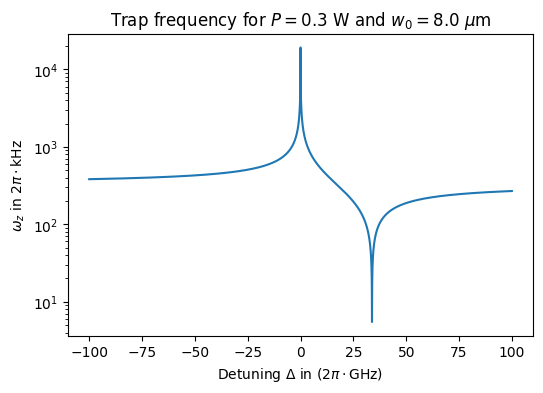

In [4]:
P = 0.3
w_0 = 8*10**(-6)
N = 10000
detuningRange = np.linspace(-100,100,N)*2*np.pi*10**9

plt.figure()
plt.semilogy(detuningRange/(2*np.pi*10**9), trapFrequency(P, w_0, detuningRange)/(2*np.pi*10**3), label = r'$\omega_{z}$')
plt.title(r'Trap frequency for $P = $'+ str(P) + ' W and $w_{0} = $' + str(10**6*w_0) + ' $\mu$m')
plt.ylabel(r'$\omega_{z}$ in $2\pi\cdot$kHz')
plt.xlabel(r'Detuning $\Delta$ in ($2\pi\cdot$GHz)')
plt.show()

### Spontaneous emission

The spontaneous emission is $\gamma = \Gamma\mathcal{P}_{e}$ with $\Gamma$ the linewidth and $\mathcal{P}_{e}$ the population in the excited state. 

We have $\mathcal{P}_{e}=\frac{1}{2}\frac{s}{1+s}\simeq \frac{\Omega^{2}}{4\Delta^{2}}$. $\Omega$ is the Rabi frequency that relates to $g$ the single photon Rabi frequency:
\begin{equation}
\Omega = g\sqrt{n+1}\simeq g\sqrt{n} = \frac{2}{\hbar}d\sqrt{\frac{\hbar\omega}{2\epsilon_{0}V}}\sqrt{n}
\end{equation}
And the photon number in a volume $V$ is simply $u/\hbar\omega = IV/c\hbar\omega$. So:
\begin{equation}
\Omega = \frac{2}{\hbar}d\sqrt{\frac{\hbar\omega}{2\epsilon_{0}V}}\sqrt{\frac{IV}{\hbar\omega c}}= \frac{d}{\hbar}\sqrt{\frac{2I}{\epsilon_{0}c}}
\end{equation}
And eventually:
\begin{equation}
\mathcal{P}_{e} = \frac{Id^{2}}{2\hbar^{2}\epsilon_{0}c\Delta^{2}}
\end{equation}

Here is the moment where one needs to be precise (and why I prefer the derivation with the Rabi frequency rather than using the saturation intensity). I think it is as if:
\begin{equation}
\Gamma_{0} = \frac{d^{2}\omega_{0}^{3}}{3\pi\hbar\epsilon_{0}c^{3}}
\end{equation}
So:
\begin{equation}
\gamma = \mathcal{P}_{e}\Gamma = \mathcal{P}_{e}\Gamma_{0}\left(\frac{\omega}{\omega_{0}}\right)^{3} = \frac{I}{2\hbar\Delta^{2}}\frac{3\pi c^{2}\Gamma_{0}^{2}}{\omega_{0}^{3}}\left(\frac{\omega}{\omega_{0}}\right)^{3}
\end{equation}
We then need to sum over all the possible excitation lines at the singlet ${}^{1}P$ states and the 741nm state.

### Clebsch-gordan coefficient consideration

The lattice will have a linear polarization, which decomposes as 50\%/50\% in $\sigma_{+}$ and $\sigma_{-}$ light to be able to both trap $+8$ and $-8$ states. We should therefore divide by 2 the effective $\Omega^{2}$ in the calculations, and similar for the spontaneous emission rate. Taking into account the different blue lines, the prefactor is eventually $\kappa_{b} = 0.85$ as if it was all coming from a 2-level system coming from the 421 line: $\gamma_{\text{blue}} \simeq 0.85\cdot\frac{I}{2\hbar\Delta_{421}^{2}}\frac{3\pi c^{2}\Gamma_{421}^{2}}{\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}$.

In [5]:
kappa_blue = (1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(1/9)*(Gamma_419_bis/Gamma_421)**2*(omega_421/omega_419_bis)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)
print(kappa_blue)

0.8465868638557852


We eventually get
\begin{equation}
\gamma_{\text{blue}} \simeq \frac{\kappa_{b} I}{2\hbar\Delta_{421}^{2}}\frac{3\pi c^{2}\Gamma_{421}^{2}}{\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}
\end{equation}
For the red transition, the overall coefficient is $\kappa_{r} = \frac{1}{2}1^{2}+\frac{1}{2}\frac{1}{153} \simeq \frac{1}{2}$, so:
\begin{equation}
\gamma_{\text{red}} \simeq \frac{\kappa_{r}I}{2\hbar\Delta_{741}^{2}}\frac{3\pi c^{2}\Gamma_{741}^{2}}{\omega_{741}^{3}}
\end{equation}
And:
\begin{equation}
\gamma = \gamma_{\text{blue}} + \gamma_{\text{red}} 
\end{equation}

Taking the intensity of a gaussian beam from \ref{gaussian_intensity} we can get the following formula:
\begin{equation}
\begin{array}{llll}
\gamma_{\text{blue}} &=& \frac{3 \kappa_{b} c^{2}\Gamma_{421}^{2}}{\hbar\Delta_{421}^{2}\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}\frac{P}{w_{0}^{2}} \\[10pt]
	&=& 4.9\cdot 10^{1} \left( \frac{P(\text{Watt})}{(w_{0}(\mu\text{m}))^{2}}\right) \text{ s}^{-1}
\end{array}
\end{equation}

In [6]:
P = 0.3 # watts
w_0 = 8*10**(-6) # meters

def gamma_blue(P, w_0):
    gamma_blue_prefactor = 3*kappa_blue*c**2*Gamma_421**2/(hbar*delta_421**2*omega_421**3)*(421/741)**3
    # prefactor = 1.13e-10 that becomes 113 once divided by (1um)**2
    return gamma_blue_prefactor*P/w_0**2

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a "
      + str(round(gamma_blue(P, w_0), 2)) + " s^-1 scattering rate from the blue lines, counted as a heating rate in a red lattice")

A P = 0.3 watt and 8 micrometers beam waist beam gives a 0.23 s^-1 scattering rate from the blue lines, counted as a heating rate in a red lattice


Similarly we have for the red state:
\begin{equation}
\begin{array}{llll}
\gamma_{\text{red}} &=& \simeq \frac{3\kappa_{r} c^{2}\Gamma_{741}^{2}}{\hbar\Delta_{741}^{2}\omega_{741}^{3}}\frac{P}{w_{0}^{2}} \\[10pt]
	&=& 2.5\cdot 10^{5} \left( \frac{P(\text{Watt})}{(w_{0}(\mu\text{m}))^{2}(\Delta(\text{GHz}))^{2}}\right) \text{ s}^{-1}
\end{array}
\end{equation}

In [7]:
P = 0.3 # watts
w_0 = 8*10**(-6) # meters
detuning = 2*np.pi*100*10**9 # Hz

def gamma_red(P, w_0, detuning):
    gamma_red_prefactor = 3*kappa_red*c**2*Gamma_741**2/(hbar*omega_741**3)
    gamma_red_prefactor_test = gamma_red_prefactor/((2*np.pi*10**9)**2*10**(-12)) # this one is equal to the formula in the text to be able to plug Delta in GHz directly and w_0 in um
    return gamma_red_prefactor/(detuning**2)*P/w_0**2

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a "
      + str(round(gamma_red(P, w_0, detuning), 2)) + " s^-1 scattering rate from the red light, counted as being in a red lattice")

A P = 0.3 watt and 8 micrometers beam waist beam gives a 0.12 s^-1 scattering rate from the red light, counted as being in a red lattice


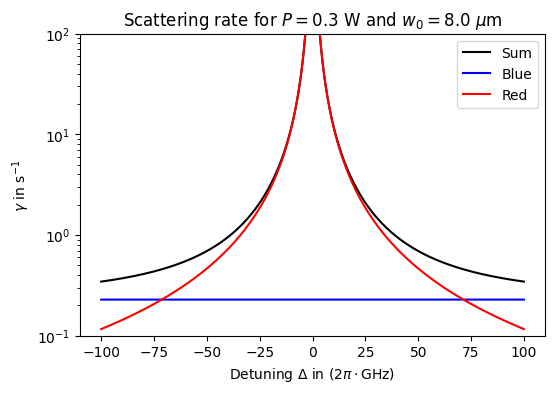

In [8]:
P = 0.3
w_0 = 8*10**(-6)
N = 10000
Detuning = np.linspace(-100,100,N)*2*np.pi*10**9
Gamma_blue = np.zeros(N) + gamma_blue(P, w_0)

plt.figure()
plt.semilogy(Detuning/(2*np.pi*10**9), Gamma_blue + gamma_red(P, w_0, Detuning), color = 'black', label = 'Sum')
plt.semilogy(Detuning/(2*np.pi*10**9), Gamma_blue, color = 'blue', label = 'Blue')
plt.semilogy(Detuning/(2*np.pi*10**9), gamma_red(P, w_0, Detuning), color = 'red', label = 'Red')
plt.ylim(10**-1,10**2)
plt.title(r'Scattering rate for $P = $'+ str(P) + ' W and $w_{0} = $' + str(10**6*w_0) + ' $\mu$m')
plt.ylabel(r'$\gamma$ in s$^{-1}$')
plt.xlabel(r'Detuning $\Delta$ in ($2\pi\cdot$GHz)')
plt.legend()
plt.show()

### Desired trap frequency

I refer here to the Ticknor paper. For our system, there are several scales. First the dipolar length:
\begin{equation}
\label{dipolar_length}
D =\mu_{m} \left(\frac{\mu_{0}}{4\pi}\right)\frac{d^{2}}{\hbar^{2}} = 10.5\text{ nm}
\end{equation}

In [9]:
D = m/2*1/(4*np.pi*epsilon_0*c**2)*(10*mu_B)**2/hbar**2
print("D = " + str(round(D*10**9,1)) + " nm")

D = 10.5 nm


With $\mu_{m} = m/2$ is the reduced mass, and $d = 10\mu_{B}$. The confinement length:
\begin{equation}
l = \sqrt{\frac{\hbar}{\mu\omega}} = \frac{352}{\sqrt{\omega(\text{kHz})}}\text{ nm}
\end{equation}

In [10]:
omega = 2*np.pi*10**6
l_osc = np.sqrt(hbar/((m/2)*omega))
print("A trap frequency omega = (2pi) " + str(int(omega/(2*np.pi*10**3))) + " kHz gives an oscillator length of "
      + str(round(l_osc*10**9, 1)) + " nm")

A trap frequency omega = (2pi) 1000 kHz gives an oscillator length of 11.1 nm


Note that here we used the reduced mass in the definition of the harmonic oscillator length, which is in agreement with what Ticknor uses.

The parameter $\bar{D} = D/l$ is then:
\begin{equation}
\bar{D} = \frac{D}{l} = 2.98\cdot 10^{-2}\sqrt{\omega(\text{kHz})}
\end{equation}

So a $\bar{D} = 0.34$ which is the threshold in the paper occurs for $\omega = 2\pi\cdot 128\text{ kHz}$ and a $\bar{D}$ of 1 for $\omega = 2\pi\cdot 1.11\text{ MHz}$

In [18]:
Dbar = 0.34
omegaThreshold = (Dbar/D)**2*hbar/(m/2)
print("Dbar = " + str(round(Dbar,2)) + " corresponds to omega = (2pi) " + str(int(omegaThreshold/(2*np.pi*10**3))) + " kHz")

Dbar = 0.34 corresponds to omega = (2pi) 128 kHz


The chemical potential of a Bose gas in a trap is:
\begin{equation}
\mu_{c} = \frac{\hbar\omega_{\text{ho}}}{2}\left(\frac{15Na}{a_{\text{ho}}}\right)^{2/5}
\end{equation}

In [12]:
#### Chemical potential
l_osc_trans = 2*10**(-6) # This is the radial oscillator length, on the order of a few micrometers.
omega_trans = hbar/(m*l_osc_trans**2) # so here I do NOT use the reduced mass, which maybe makes the whole thing a bit incoherent
omega_z = 2*np.pi*10**5
l_osc_z = np.sqrt(hbar/(m*omega_z))
N = 1000
a = 100*a_0

omega_av = (omega_z*omega_trans*omega_trans)**(1/3)
l_osc_av = (l_osc_z*l_osc_trans*l_osc_trans)**(1/3)
mu_c = hbar*omega_av/2*(15*N*a/l_osc_av)**(2/5)
print("The chemical potential is (2pi hbar) " + str(int(mu_c/(hbar*2*np.pi))) + " Hz")

The chemical potential is (2pi hbar) 1125 Hz


It gives $\mu_{c}/\hbar = 2\pi\cdot 1\text{ kHz}$ to 3 kHz for a trap depth varying from 100 kHz to 1 MHz trap with $10^{3}$ atoms and $100 a_{0}$ for the scattering length. Calculated in the blue lattice case (see later) with a transverse oscillator length of $2\mu$m. It has to be compared with the dipolar energy defined in the paper:
\begin{equation}
E_{D} = \frac{\hbar^{2}}{2\mu_{m}D^{2}} = \hbar (2\pi\cdot 556\text{ kHz})
\end{equation}

In [13]:
E_D = hbar**2/(m*D**2)
print("E_D = (2pi hbar) " + str(int(E_D/(2*np.pi*hbar*10**3))) + " kHz")

E_D = (2pi hbar) 556 kHz


Ticknor paper uses a WKB approximation to calculate the tunneling probability, and therefore the reduction we can expect in the losses. It uses the ratio of collisional energy to dipolar energy $y = log_{10}(E/E_{D})$. If the collisional energy is the chemical potential, we would probably always be in the strong 2D (and not the semiclassical limit) as depicted in figure 5 of the paper. The tunneling probability is depicted as follow in the formula 4 of the paper:
\begin{equation}
\begin{array}{cllll}
\ln(P_{T}) &=& a\bar{D}^{2/5} + b\bar{D}^{-1/10} \\
a &=& -5.17436 + 0.143167 y + 0.0093433 y^{2} \\
b &=& 5.16437 + 1.61799 y + 0.135513 y^{2}\\
\end{array}
\end{equation}

In [24]:
mu_c = 2*np.pi*hbar*1.0*10**3 # chemical potential
y = np.log10(mu_c/E_D)
a = -5.17436 + 0.143167*y + 0.0093433*y**2
b = 5.16437 + 1.61799*y + 0.135513*y**2
def ln_P_T(omega): #omega doesn't include the 2pi. mu_c = 2pi 2 kHz
    Dbar = D/np.sqrt(hbar/(m/2*omega))
    return a*(Dbar**(2/5))+b*(Dbar**(-1/10))

omega = 2*np.pi*1.0*10**6    # trap frequency
print("The reduction is " + str(round(np.exp(ln_P_T(omega)-ln_P_T(omegaThreshold)),2)) + " compare to threshold")

The reduction is 0.14 compare to threshold


### Comments on density

### Acceptable scattering rate

To know how big of a trapping frequency we can afford, one can plot the maximum trapping frequency available for a given scattering rate. This is done bellow for different beam waist. The zero is due to the background polarizability at 741.

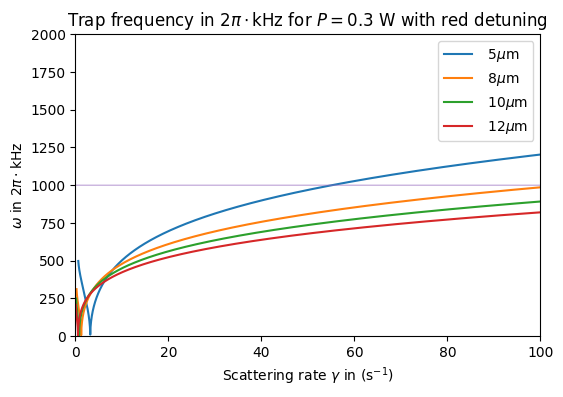

In [30]:
w_0_list = np.array([5, 8, 10, 12])*10**(-6)   # This is the list of the different beam waists we want to try
P = 0.3   # laser power
Detuning = np.linspace(300,0.01,10000)*2*np.pi*10**9    # + for blue detuning


plt.figure()
for w_0 in w_0_list:
    Omega = trapFrequency(P, w_0, Detuning)
    Gamma = gamma_blue(P, w_0) + gamma_red(P, w_0, Detuning)
    Omega_norm = Omega/(2*np.pi*10**3)
    plt.plot(Gamma, Omega_norm, label = r' '+ str(int(w_0*10**6)) + '$\mu$m' )
plt.plot(Gamma, Gamma*0 + 1000, lw = 0.5)
plt.xlim((0,100))
plt.ylim((0,2000))
plt.title(r'Trap frequency in $2\pi\cdot$kHz for $P = $'+ str(P)+' W with red detuning')
plt.xlabel(r'Scattering rate $\gamma$ in (s$^{-1}$)')
plt.ylabel(r'$\omega$ in $2\pi\cdot$kHz')
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------------------